In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [59]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [61]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [62]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

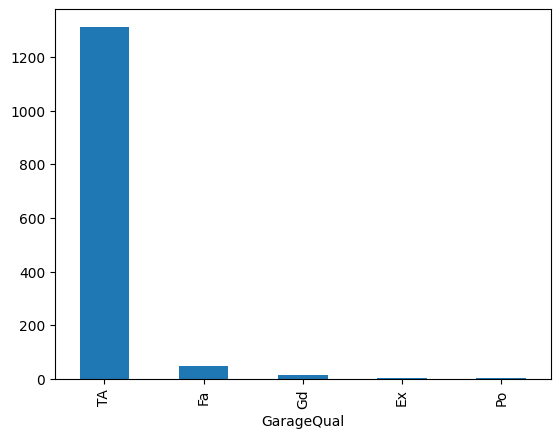

In [63]:
df["GarageQual"].value_counts().sort_values(ascending=False).plot(kind="bar")

In [64]:
# replace the null values with "missing"
df["GarageQual"] =  df["GarageQual"].fillna("missing")

<Axes: xlabel='GarageQual'>

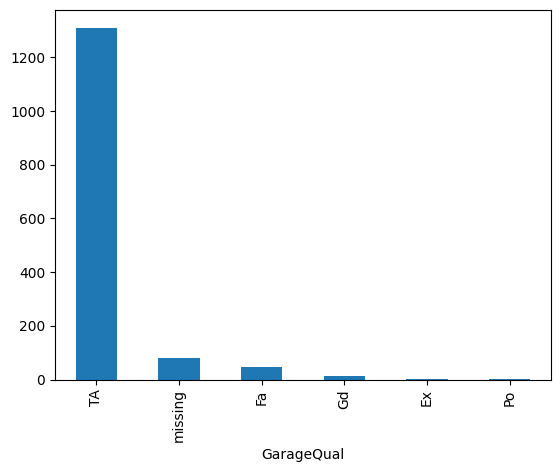

In [65]:
df["GarageQual"].value_counts().sort_values(ascending=False).plot(kind="bar")

## Using skLearn

In [66]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [68]:
imputer = SimpleImputer(strategy="constant", fill_value="missing")

In [69]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [70]:
X_train = pd.DataFrame(X_train, columns= ["FireplaceQu","GarageQual"])
X_train.head()

,FireplaceQu,GarageQual
0,missing,TA
1,Gd,Fa
2,missing,TA
3,Gd,TA
4,missing,TA


In [71]:
X_train.isnull().sum()

FireplaceQu    0
GarageQual     0
dtype: int64